<a href="https://colab.research.google.com/github/DinneRatj/Vector-Embedding-Model/blob/main/LMCL_1st_Run_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imporing libraries
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch.autograd import Variable
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

#Added so that the random numbers are always the same when the program is run, so the results are always the same
np.random.seed(1234)
torch.manual_seed(1234)

In [ ]:
#Mounting to Gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading data
dataset = pd.read_csv("/content/drive/MyDrive/Degree and Master Study/S2 Binus/Semester 6/Thesis Deep Learning/Koding/bigml_59c28831336c6604c800002a.csv")
pd.options.display.max_columns = None
dataset

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [ ]:
#Defining columns
numerical_columns = ['number vmail messages', 'total day minutes', 'total day calls',
                     'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes',
                     'total night calls', 'total night charge', 'total intl minutes', 'total intl calls',
                     'total intl charge', 'customer service calls']
categorical_columns = ['state', 'international plan', 'voice mail plan','area code']
outputs = ['churn']

#Input >14 Numerical coloums and 4 Categorical coloums
#Output > 1 Categorical coloum

In [ ]:
churn_data = dataset[dataset['churn'] == 'True']
notchurn_data = dataset[dataset['churn'] == 'False']

In [ ]:
#Processing columns
scaler = StandardScaler()

#Numerical
#Convert our numerical columns to tensors
numerical_data = np.stack([dataset[col].values for col in numerical_columns], 1)

#Fixed how to use scaler
numerical_data = scaler.fit_transform(numerical_data)
numerical_data = torch.tensor(numerical_data, dtype=torch.float)

#Categorical
#Convert the types for categorical columns to category
for category in categorical_columns:
    dataset[category] = dataset[category].astype('category')

#Convert data in the four categorical columns into numpy arrays and then stack all the columns horizontally 
st = dataset['state'].cat.codes.values
ip = dataset['international plan'].cat.codes.values
vm = dataset['voice mail plan'].cat.codes.values
ac = dataset['area code'].cat.codes.values

categorical_data = np.stack([st, ip, vm, ac], 1)
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)

#Outputs
#Convert the output numpy array into a tensor object
dataset[outputs] = dataset[outputs].astype(int)
outputs = torch.tensor(dataset[outputs].values).flatten()
outputs = outputs.long()

#Print Outputs
print(numerical_data)
print(numerical_data.dtype)
print(numerical_data.shape)
print('_' * 75)

print(categorical_data)
print(categorical_data.dtype)
print(categorical_data.shape)
print('_' * 75)

tensor([[ 1.2349,  1.5668,  0.4766,  ..., -0.6012, -0.0857, -0.4279],
        [ 1.3079, -0.3337,  1.1245,  ..., -0.6012,  1.2412, -0.4279],
        [-0.5918,  1.1683,  0.6760,  ...,  0.2115,  0.6972, -1.1882],
        ...,
        [-0.5918,  0.0188,  0.4268,  ...,  0.6179,  1.3871,  0.3324],
        [-0.5918,  0.6248,  0.2275,  ...,  2.2434, -1.8770,  0.3324],
        [ 1.2349,  1.0030,  0.6261,  ..., -0.1948,  1.2412, -1.1882]])
torch.float32
torch.Size([3333, 14])
___________________________________________________________________________
tensor([[16,  0,  1,  1],
        [35,  0,  1,  1],
        [31,  0,  0,  1],
        ...,
        [39,  0,  0,  2],
        [ 6,  1,  0,  2],
        [42,  0,  1,  1]])
torch.int64
torch.Size([3333, 4])
___________________________________________________________________________


In [ ]:
#Dividing dataset into Training, Valid and Test
total_records = 3333

train_records = int(total_records * .6)
valid_records = int(total_records * .2)
test_records = int(total_records * .2)

numerical_train_data = numerical_data[:train_records]
numerical_valid_data = numerical_data[train_records:train_records+valid_records]
numerical_test_data = numerical_data[train_records+valid_records:total_records]

categorical_train_data = categorical_data[:train_records]
categorical_valid_data = categorical_data[train_records:train_records+valid_records]
categorical_test_data = categorical_data[train_records+valid_records:total_records]

train_outputs = outputs[:train_records]
valid_outputs = outputs[train_records:train_records+valid_records]
test_outputs = outputs[train_records+valid_records:total_records]

#Print divide dataset
print(train_records)
print(valid_records)
print(test_records)

1999
666
666


In [ ]:
#Define a class named Model, which will be used to train the model
from torch.nn.parameter import Parameter
from torch.nn import init
import math

#Creating the Neural Network
class Model(nn.Module):

    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(14, 100) #Numerical
        self.relu = nn.ReLU(inplace=True)
        self.bn1 = nn.BatchNorm1d(100)

# =============================================================================================
#weights 1 and 2 don't exist in this model because they already exist
#as the self.centers attribute in the LMC_Loss model in model_utils.py.
# =============================================================================================
        
        #Categorical
        self.layer1_1 = nn.Embedding(51, 5) #51 unique data cat state coloum as input and 5 dimensi/vector size as output
        self.bn1_1 = nn.BatchNorm1d(5)
        self.layer1_2 = nn.Embedding(2, 5) #2 unique data cat state coloum as input and 5 dimensi/vector size as output
        self.bn1_2 = nn.BatchNorm1d(5)
        self.layer1_3 = nn.Embedding(2, 5) #2 unique data cat state coloum as input and 5 dimensi/vector size as output
        self.bn1_3 = nn.BatchNorm1d(5)
        self.layer1_4 = nn.Embedding(3, 5) #3 unique data cat state coloum as input and 5 dimensi/vector size as output
        self.bn1_4 = nn.BatchNorm1d(5)
        
        self.layer2 = nn.Linear(120, 120)
        self.bn2 = nn.BatchNorm1d(120)
        
    def forward(self, x_numerical, x_categorical):
        x1 = self.layer1(x_numerical)
        x1 = self.relu(x1)
        x1 = self.bn1(x1)
               
        #Decoder
        x1_embedding = self.layer1_1(x_categorical[:,0])
        x1_embedding = self.relu(x1_embedding)
        x1_embedding = self.bn1_1(x1_embedding)
        
        x2_embedding = self.layer1_2(x_categorical[:,1])
        x2_embedding = self.relu(x2_embedding)
        x2_embedding = self.bn1_2(x2_embedding)
        
        x3_embedding = self.layer1_3(x_categorical[:,2])
        x3_embedding = self.relu(x3_embedding)
        x3_embedding = self.bn1_3(x3_embedding)
        
        x4_embedding = self.layer1_4(x_categorical[:,3])
        x4_embedding = self.relu(x4_embedding)
        x4_embedding = self.bn1_4(x4_embedding)
        
        x_embedding = torch.cat([x1_embedding,x2_embedding,x3_embedding,x4_embedding], 1)
                
        x1 = torch.cat([x1, x_embedding], 1)
        
        #Decoder
        x2 = self.layer2(x1)        
        emb = self.relu(x2)
        x2 = self.bn2(emb)
        
        return emb, x2

In [ ]:
model = Model()

In [ ]:
!cp /content/drive/MyDrive/model_lmcl.py /content

In [ ]:
# =============================================================================================
#loss function is replaced by using Large Margin Cosine (LMC) Loss implementation
#in the following YirongMao repo: https://github.com/YirongMao/softmax_variants
#
#LMC Loss is a loss function that in theory will be implemented from the start.
#Paper LMC Loss: https://arxiv.org/abs/1801.09414
#
#Cosine Embedding Loss which was used was not actually the same mathematical as LMC Loss,
#therefore the implementation was replaced with the implementation of YirongMao 
# =============================================================================================
# =============================================================================================
#Added a new loss with the LMCLoss library from YirongMao. Cross entropy loss persists,
#because YirongMao's LMCLoss implementation still utilizes Pytorch's original Cross Entropy Loss.
#Check the implementation method at: https://github.com/YirongMao/softmax_variants/blob/master/train_mnist_LMCL.py
#
#margin (parameter m) uses a value of 0.35,
#according to the results of research from the original LMCLoss paper which found that the optimal value was 0.35 or 4.
# =============================================================================================
import model_lmcl

lmcl_loss = model_lmcl.LMCL_loss(num_classes=2, feat_dim=120, m=0.35)
optimizer_lmcl = torch.optim.Adam(lmcl_loss.parameters(), lr=0.001)
# =============================================================================================
#For cross entropy loss, weight parameter was added,
#because it turned out to be imbalance data (not churn data is much more than churn, with a ratio of around 85:15).
#This imbalance data causes the prediction results for the churn class to be not good.
#The solution is to use the weight parameter in the cross entropy loss,
#so the penalty for being wrong in the churn class is much greater than for being wrong in the not churn class.
#Penalty is increased by the inverse ratio of the ratio of the amount of data (15:85)
#===============================================================================================
#Defining churn:loyal weight ratio. churn_percentage=0.7 means churn:loyal weight ratio of 7:3.
#===============================================================================================
churn_percentage = 0.7

#Defining loss function
loss_function = nn.CrossEntropyLoss(weight=torch.Tensor([1-churn_percentage, churn_percentage]))

#Defining optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#Added learning rate scheduler
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

In [ ]:
#Training the data
epochs = 100 #The number of times the dataset will be used to train the model
batch_size = 10 #Besaran kumpulan atau pecahan data dari dataset

mean_losses_train = []
mean_losses_valid = []

best_loss_valid = np.inf

for i in range(epochs):
    model.train()
    aggregated_losses_train = []
    aggregated_losses_valid = []
    i += 1
#added random permutation for shuffle data training
    idxs_train = np.random.permutation(train_records)
    for j in range((train_records//batch_size)+1):
        start_train = j*batch_size
        end_train = start_train+batch_size

        idxs_batch_train = idxs_train[start_train:end_train] #for shuffle training dataset

        #input is replaced with categorical_train_data and numerical_train_data
        train, train_embed = model(numerical_train_data[idxs_batch_train], categorical_train_data[idxs_batch_train])
        
        logits, mlogits = lmcl_loss(train_embed, train_outputs[idxs_batch_train])

        train_loss = loss_function(mlogits, train_outputs[idxs_batch_train])
        aggregated_losses_train.append(train_loss)

        print(f'iteration: {j:3} loss: {train_loss.item():10.8f}')

        optimizer.zero_grad()
        optimizer_lmcl.zero_grad()
        train_loss.backward()
        optimizer.step()
        optimizer_lmcl.step()
        mean_loss_train = torch.mean(torch.stack(aggregated_losses_train))
        
    print(f'epoch: {i:3} mean loss training: {mean_loss_train.item():10.8f}')
    mean_losses_train.append(mean_loss_train)
#==============================================================================================
#validation
#==============================================================================================        
    model.eval()
    with torch.set_grad_enabled(False):
        idxs_valid = np.random.permutation(valid_records)
        for k in range((valid_records//batch_size)+1):
            start_valid = k*batch_size
            end_valid = start_valid+batch_size

            idxs_batch_valid = idxs_valid[start_valid:end_valid] #for shuffle validation dataset

            #input is replaced with categorical_valid_data and numerical_valid_data
            valid, valid_embed = model(numerical_valid_data[idxs_batch_valid], categorical_valid_data[idxs_batch_valid])
            logits, mlogits = lmcl_loss(valid_embed, valid_outputs[idxs_batch_valid])
            
            #loss name is differentiated between train and validation, outputs is changed to valid_outputs
            valid_loss = loss_function(mlogits, valid_outputs[idxs_batch_valid])
            aggregated_losses_valid.append(valid_loss)

    mean_loss_valid = torch.mean(torch.stack(aggregated_losses_valid))

    print(f'epoch: {i:3} mean loss validation: {mean_loss_valid:.8f}')

#======================================================================
#The model is saved when the loss is lowest not at the end of the epoch
#======================================================================
    if mean_loss_valid.cpu().numpy()[()] < best_loss_valid:
        best_loss_valid = mean_loss_valid
        torch.save(model.state_dict(), "/content/drive/MyDrive/Degree and Master Study/S2 Binus/Semester 6/Thesis Deep Learning/Koding/Train Model/LMCL.pth".format(churn_percentage))
        torch.save(lmcl_loss.state_dict(), "/content/drive/MyDrive/Degree and Master Study/S2 Binus/Semester 6/Thesis Deep Learning/Koding/Train Model/LMCLOSS.pth".format(churn_percentage))
        best_epoch = i

    mean_losses_valid.append(mean_loss_valid)

    scheduler.step()

Streaming output truncated to the last 5000 lines.
iteration:  50 loss: 0.04543713
iteration:  51 loss: 1.06574643
iteration:  52 loss: 0.12058458
iteration:  53 loss: 0.82898432
iteration:  54 loss: 0.10407743
iteration:  55 loss: 0.13535579
iteration:  56 loss: 0.61765909
iteration:  57 loss: 1.14344633
iteration:  58 loss: 0.05880702
iteration:  59 loss: 0.25931439
iteration:  60 loss: 0.49173939
iteration:  61 loss: 0.14766651
iteration:  62 loss: 0.24228287
iteration:  63 loss: 1.48857081
iteration:  64 loss: 0.23354550
iteration:  65 loss: 0.69478321
iteration:  66 loss: 0.14913011
iteration:  67 loss: 1.01760137
iteration:  68 loss: 0.22796923
iteration:  69 loss: 1.43806672
iteration:  70 loss: 1.44672883
iteration:  71 loss: 0.44512179
iteration:  72 loss: 1.37998033
iteration:  73 loss: 1.02325737
iteration:  74 loss: 0.14885002
iteration:  75 loss: 2.78266573
iteration:  76 loss: 0.90702122
iteration:  77 loss: 0.47569045
iteration:  78 loss: 0.09320880
iteration:  79 loss: 

In [ ]:
#Load training model
model.load_state_dict(torch.load("/content/drive/MyDrive/Degree and Master Study/S2 Binus/Semester 6/Thesis Deep Learning/Koding/Train Model/LMCL.pth".format(churn_percentage)))
lmcl_loss.load_state_dict(torch.load("/content/drive/MyDrive/Degree and Master Study/S2 Binus/Semester 6/Thesis Deep Learning/Koding/Train Model/LMCLOSS.pth".format(churn_percentage)))

<All keys matched successfully>

In [ ]:
#Creating predictions
with torch.no_grad():
    valid, valid_embed = model(numerical_valid_data, categorical_valid_data)
    logits, mlogits = lmcl_loss(valid_embed, valid_outputs)
    valid_loss = loss_function(mlogits, valid_outputs)
    total_valid_loss = valid_loss
print(f'Loss: {total_valid_loss:.8f}')

Loss: 0.84197229


In [ ]:
#=============================================================================================
#the main result seen is the F1 Score, because
#the misleading accuracy metric is used for imbalance data
#=============================================================================================
from sklearn.metrics import f1_score

valid_val = np.argmax(logits.data, axis=1)
print(confusion_matrix(valid_outputs, valid_val))
print(classification_report(valid_outputs, valid_val))
print("Accuracy: ", accuracy_score(valid_outputs, valid_val))
print("F1 Score: ", f1_score(valid_outputs, valid_val, average='macro'))

[[541  23]
 [ 24  78]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       564
           1       0.77      0.76      0.77       102

    accuracy                           0.93       666
   macro avg       0.86      0.86      0.86       666
weighted avg       0.93      0.93      0.93       666

Accuracy:  0.9294294294294294
F1 Score:  0.8634215727768154


In [ ]:
#function for smoothing the loss plot by using exponential moving average
#https://stackoverflow.com/questions/42281844/what-is-the-mathematics-behind-the-smoothing-parameter-in-tensorboards-scalar
def smooth(scalars, weight):
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

In [ ]:
me_losses_train = []
for l in mean_losses_train:
  me_losses_train.append(l.detach().numpy())

print (me_losses_train)
print (mean_losses_valid)

[array(1.8500252, dtype=float32), array(1.2968166, dtype=float32), array(1.1473203, dtype=float32), array(1.0358256, dtype=float32), array(0.9656413, dtype=float32), array(0.9585012, dtype=float32), array(0.88371557, dtype=float32), array(0.85299337, dtype=float32), array(0.8776589, dtype=float32), array(0.80568755, dtype=float32), array(0.8088623, dtype=float32), array(0.76407427, dtype=float32), array(0.82411987, dtype=float32), array(0.7525364, dtype=float32), array(0.7627035, dtype=float32), array(0.7372519, dtype=float32), array(0.7198498, dtype=float32), array(0.709865, dtype=float32), array(0.6816058, dtype=float32), array(0.70940936, dtype=float32), array(0.6766739, dtype=float32), array(0.68686074, dtype=float32), array(0.667416, dtype=float32), array(0.6354763, dtype=float32), array(0.6751758, dtype=float32), array(0.6496592, dtype=float32), array(0.65353966, dtype=float32), array(0.6255463, dtype=float32), array(0.65573347, dtype=float32), array(0.6448337, dtype=float32), ar

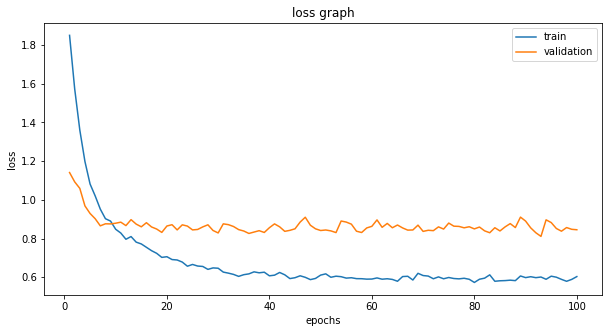

93


In [ ]:
epochs_to_show = 100
smoothing = 0.5
plt.figure(figsize=(10,5))
plt.plot(range(1,epochs_to_show+1), smooth(me_losses_train[0:epochs_to_show],smoothing), label = 'train')
plt.plot(range(1,epochs_to_show+1), smooth(mean_losses_valid[0:epochs_to_show],smoothing), label = 'validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.title('loss graph')
plt.show()
print(best_epoch)